In [1]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image

In [3]:
dataset_directory_location = '/content/tomato'

In [4]:
os.listdir(dataset_directory_location)

['train', 'val', 'cnn_train.py']

In [5]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'val')

In [6]:
os.listdir(train_dataset_location)

['Tomato___Target_Spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold']

In [7]:
os.listdir(test_dataset_location)

['Tomato___Target_Spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold']

In [8]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [9]:
os.listdir(tomato_bacterial_spot_img)[:1]

['d374d0c5-2a5c-4d5e-afc6-0410d91c9d55___GCREC_Bact.Sp 6321.JPG']

In [10]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, 'a3085acc-b437-4987-997b-a2be5b5e9c0d___GCREC_Bact.Sp 3680.JPG'))

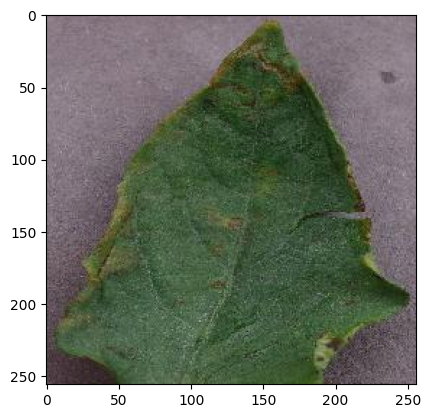

In [11]:
plt.imshow(tomato_bacterial_spot_img_read)

In [12]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

In [13]:
correct_image_shape = (224, 224, 3)

In [14]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               preprocessing_function=preprocess_input)

In [15]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location,
                                                target_size=correct_image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location,
                                                target_size=correct_image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [16]:
model = Sequential()

In [17]:
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=correct_image_shape)

80134624/80134624 [==============================] - 0s 0us/step


In [18]:
vgg19_model.trainable = False

In [19]:
model.add(vgg19_model)


model.add(Flatten())


model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [21]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [22]:
model.fit(train_image_gen, validation_data=test_image_gen, epochs=30)

Epoch 1/30
625/625 [==============================] - 245s 388ms/step - loss: 0.9348 - accuracy: 0.6936 - val_loss: 0.6027 - val_accuracy: 0.8020
Epoch 2/30
625/625 [==============================] - 236s 378ms/step - loss: 0.5330 - accuracy: 0.8242 - val_loss: 0.4932 - val_accuracy: 0.8430
Epoch 3/30
625/625 [==============================] - 235s 376ms/step - loss: 0.4208 - accuracy: 0.8618 - val_loss: 0.4803 - val_accuracy: 0.8610
Epoch 4/30
625/625 [==============================] - 236s 378ms/step - loss: 0.3795 - accuracy: 0.8738 - val_loss: 0.4295 - val_accuracy: 0.8740
Epoch 5/30
625/625 [==============================] - 238s 381ms/step - loss: 0.3450 - accuracy: 0.8854 - val_loss: 0.4443 - val_accuracy: 0.8650
Epoch 6/30
625/625 [==============================] - 237s 380ms/step - loss: 0.3135 - accuracy: 0.8957 - val_loss: 0.4927 - val_accuracy: 0.8520
Epoch 7/30
625/625 [==============================] - 237s 378ms/step - loss: 0.2893 - accuracy: 0.9035 - val_loss: 0.4467 -

In [23]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

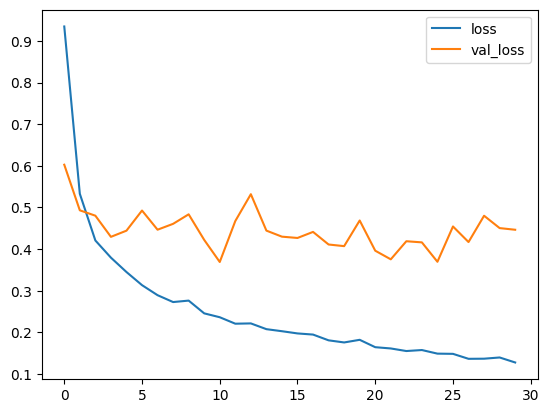

In [24]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

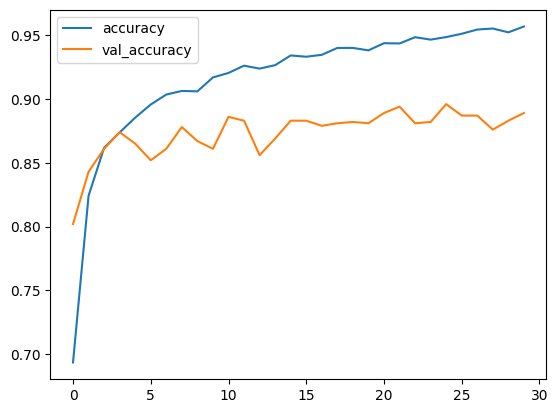

In [25]:
history_df[['accuracy', 'val_accuracy']].plot()

In [26]:
model.evaluate(train_image_gen)[1]

625/625 [==============================] - 208s 332ms/step - loss: 0.0795 - accuracy: 0.9760


0.9760000109672546

In [27]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 21s 326ms/step - loss: 0.3763 - accuracy: 0.9060


0.906000018119812

In [29]:
sample_img_load = image.load_img('/content/tomato/val/Tomato___Target_Spot/0a3b6099-c254-4bc3-8360-53a9f558a0c4___Com.G_TgS_FL 8259.JPG', target_size=correct_image_shape)

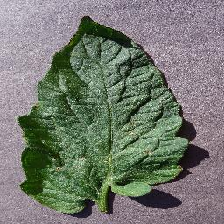

In [30]:
sample_img_load

In [31]:
sample_img_to_arr = image.img_to_array(sample_img_load)

In [32]:
sample_img_to_arr_preprocess_input = preprocess_input(sample_img_to_arr)

In [33]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr_preprocess_input, 0)

In [34]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 0s 316ms/step


In [35]:
pred_result = np.argmax(prediction)

In [36]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [37]:
pred_final_result = class_names[pred_result]

In [38]:
pred_final_result

'Tomato___Target_Spot'

In [40]:
model.save('02_CNN_VGG19.h5')